In [361]:
from sklearn.externals import joblib
import pandas as pd
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import re
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud, STOPWORDS

init_df = pd.read_csv('/Users/yiyangzhang/CS@Northeastern University/CS7180_AI/Wine-review-Project-master/wine-reviews_data/winemag-data-130k-v2.csv', na_values="?")
init_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [362]:
print("Length of dataframe before duplicates are removed:", len(init_df))

Length of dataframe before duplicates are removed: 129971


In [363]:
init_df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [364]:
init_df.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [365]:
init_df.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

Drop feature region_2 due to the large amount of null elements.

In [366]:
df1 = init_df.drop(["region_2"], axis=1)
df1 = df1.dropna()

## 1. Data Analysis and Visualization

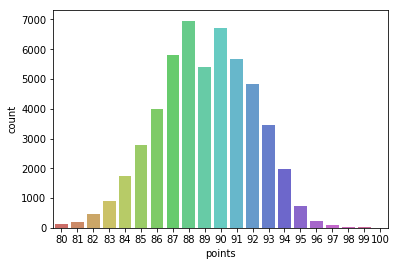

In [367]:
sns.countplot(x='points',data = df1, palette='hls' )
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


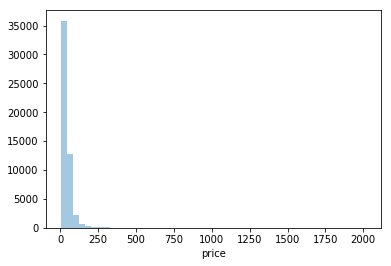

In [368]:
sns.distplot(df1['price'], hist=True,kde=False);

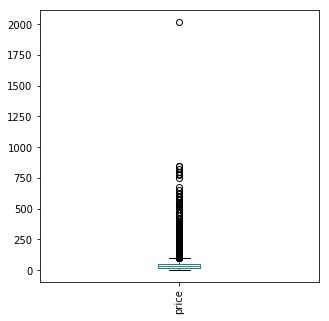

In [369]:
df1.boxplot(['price'], rot=90, figsize=(5,5), grid=False)

In [370]:
# drop the outlier and fill the null with mean value
df2=df1[df1['price']<200]
df2['price'].fillna(df2['price'].mean())
df2.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


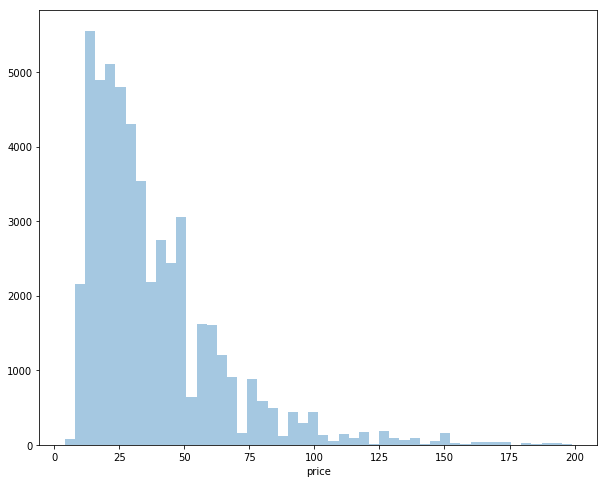

In [371]:
plt.figure(1,figsize=[10,8])
sns.distplot(df2['price'], kde=False);

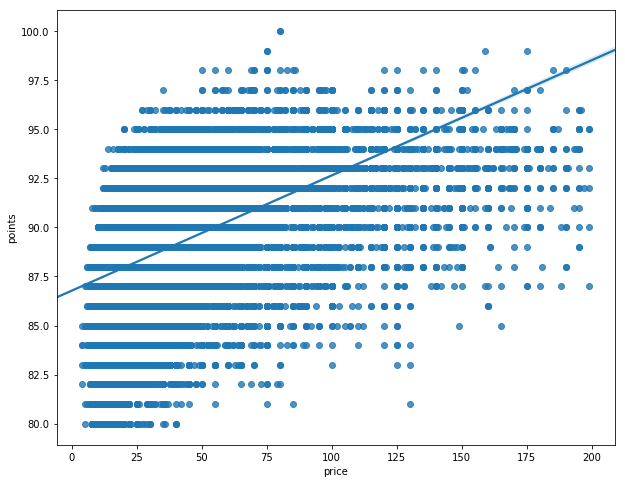

In [372]:
plt.figure(1,figsize=[10,8])
sns.regplot(x='price', y='points', data=df2)

Regression might not be a good approach to using price to predict points or use points to predict price.

In [373]:
points_by_price = init_df['points'] / init_df['price']
points_by_price = (points_by_price).round(2)
s1 = pd.Series(points_by_price, name = 'PointsByPrice')
wine = pd.concat([init_df, s1], axis = 1)
wine = wine.dropna()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


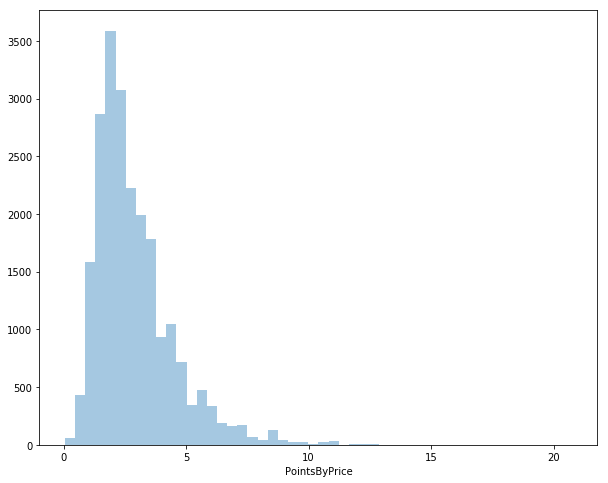

In [374]:
plt.figure(1,figsize=[10,8])
sns.distplot(wine['PointsByPrice'], kde=False);

In [375]:
sorted_wine = wine.sort_values(by = ['PointsByPrice'], ascending=False)
sorted_wine = sorted_wine[['country', 'designation', 'price', 'points', 'province', 'variety', 'winery', 'PointsByPrice']]
sorted_wine.head(10)

,country,designation,price,points,province,variety,winery,PointsByPrice
59507,US,Unoaked,4.0,83,California,Chardonnay,Pam's Cuties,20.75
104412,US,Fizz,5.0,87,California,Sparkling Blend,Mancan,17.40
8428,US,Organic Grapes,5.0,85,California,Chardonnay,Earth's Harvest,17.00
37951,US,Organic Grapes,5.0,85,California,Chardonnay,Earth's Harvest,17.00
63697,US,Red Table Wine,7.0,89,Washington,Red Blend,Hogue,12.71
49652,US,Late Harvest,7.0,88,Washington,White Riesling,Kiona,12.57
49653,US,Late Harvest,7.0,88,Washington,Muscat,Kiona,12.57
11809,US,Willow Springs,7.0,86,California,Pinot Grigio,CK Mondavi,12.29
72670,US,Willow Springs,7.0,86,California,Pinot Grigio,CK Mondavi,12.29
112286,US,Scarlet Five Wildcreek Canyon,7.0,85,California,Bordeaux-style Red Blend,CK Mondavi,12.14


In [376]:
GoodWIne = sorted_wine['points'].map(lambda x: x > 92)
GoodWIne = sorted_wine[GoodWIne]
sorted_US = GoodWIne.sort_values(by = ['PointsByPrice'], ascending=False)
sorted_US.head(10)

,country,designation,price,points,province,variety,winery,PointsByPrice
111256,US,Muscat a Petits Grains Vin Doux Naturel,15.0,93,California,Muscat,Terre Rouge,6.20
69526,US,Secco,16.0,94,California,Moscato Giallo,Uvaggio,5.88
26389,US,Estate,16.0,93,Oregon,Pinot Gris,David Hill,5.81
65623,US,JTW Reserve Port,16.0,93,Washington,Touriga Nacional Blend,Thurston Wolfe,5.81
87321,US,6th Sense,16.0,93,California,Syrah,Michael David,5.81
123776,US,Petite Petit,18.0,94,California,Petite Sirah,Michael David,5.22
84597,US,Estate,18.0,94,Oregon,Riesling,David Hill,5.22
6267,US,Lucille Late Harvest,18.0,94,Washington,Viognier,Stottle,5.22
43155,US,Monarch Mine Vineyard,18.0,93,California,Sauvignon Blanc,Easton,5.17
109062,US,Evergreen Vineyard,18.0,93,Washington,Riesling,Efeste,5.17


In [377]:
def value_for_money(column1, column2):
    new_df = init_df.sort_values(by='ratio_of_performance_to_price', 
                   ascending=False)[['ratio_of_performance_to_price', 
                                     column1, 
                                     column2]].head(20).reset_index().set_index([column1, column2])
    return new_df

In [378]:
init_df['ratio_of_performance_to_price'] = init_df["points"].div(init_df['price'])
init_df.dropna(subset=['price'], inplace=True)

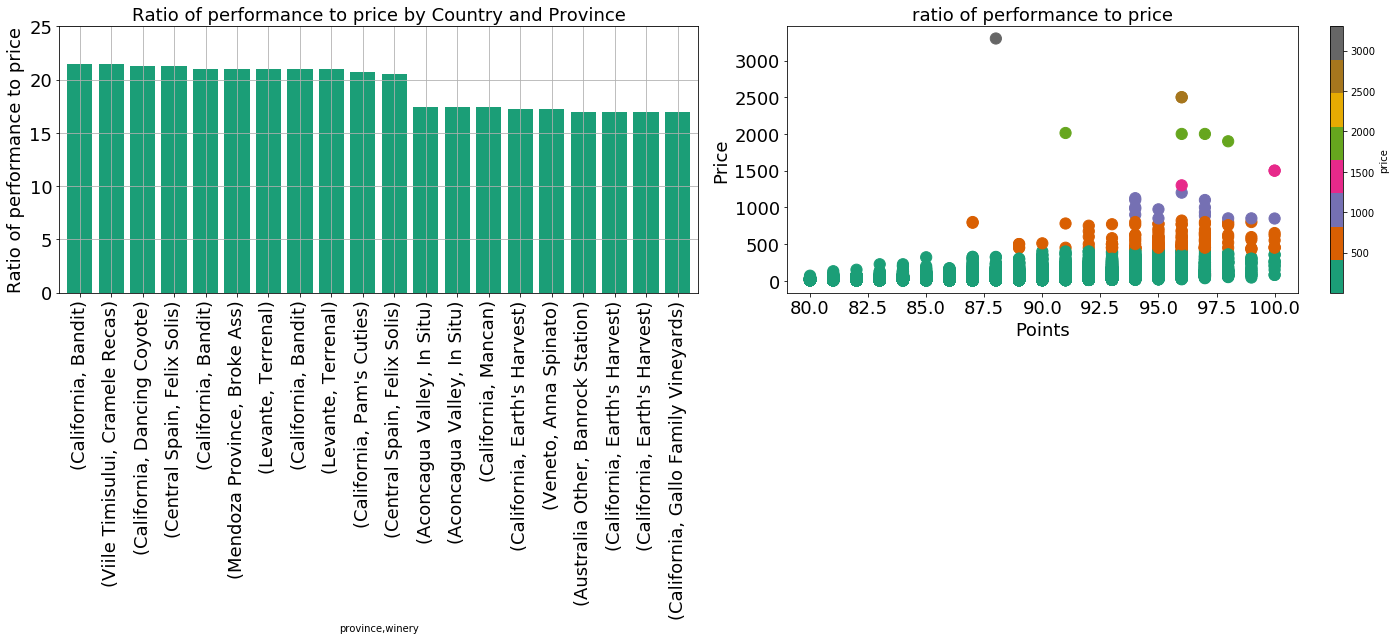

In [379]:
ax1 = plt.subplot(121)
value_for_money('province', 'winery')["ratio_of_performance_to_price"].plot(kind='bar', 
                                                              width=0.8, grid=True, colormap='Dark2', figsize=(20,9), ax=ax1)
plt.ylim(0,25)
plt.ylabel(s='Ratio of performance to price', fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.title("Ratio of performance to price by Country and Province", fontsize=18)

ax2 = plt.subplot(122)
init_df[["price", 'points']].plot(kind='scatter', x='points', y='price', c='price', colormap='Dark2', s=125, figsize=(20,9), ax=ax2)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(s='Points', fontsize=18)
plt.ylabel(s="Price", fontsize=18)
plt.xlim(79, 101, 1)
plt.title("ratio of performance to price", fontsize=18)

plt.tight_layout()
plt.show()

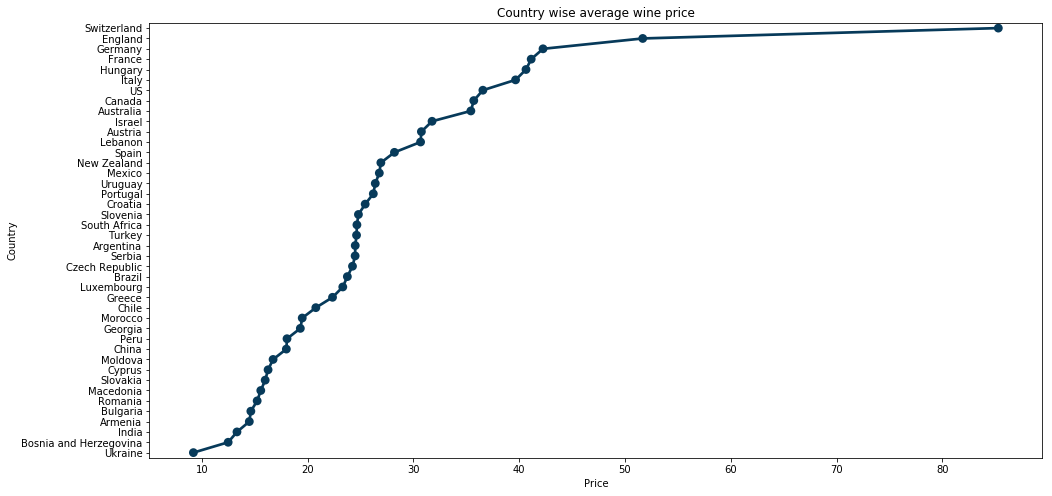

In [380]:
cnt = init_df.groupby(['country']).mean()['price'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,8))
sns.pointplot(x = cnt['price'] ,y = cnt.index ,color='#073a5a',orient='h',markers='o')
plt.title('Country wise average wine price')
plt.xlabel('Price')
plt.ylabel('Country');

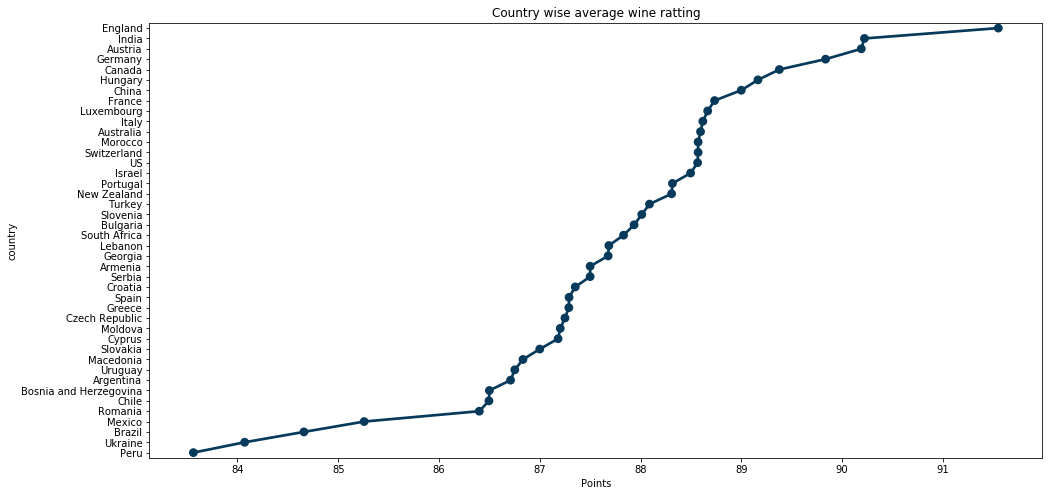

In [381]:
cnt = init_df.groupby(['country']).mean()['points'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,8))
sns.pointplot(x = cnt['points'] ,y = cnt.index ,color='#073a5a',orient='h')
plt.title('Country wise average wine ratting')
plt.xlabel('Points');

In [382]:
cnt = init_df.groupby(['country','points'])['price'].agg(['count','min','max','mean']).sort_values(by='mean',ascending=False)[:20]
cnt.reset_index(inplace=True)
cnt.style.background_gradient(cmap='PuBu',high=0.5)

,country,points,count,min,max,mean
0,Germany,98,1,775,775,775
1,France,100,8,150,1500,685.375
2,Australia,99,2,300,850,575
3,Portugal,100,2,450,650,550
4,France,99,3,159,800,506.333
5,Germany,97,7,245,775,464.714
6,Spain,98,1,450,450,450
7,France,98,14,70,1900,449.429
8,Italy,100,4,210,550,372.5
9,France,97,50,45,2000,363.38


### Relationship Between country and point

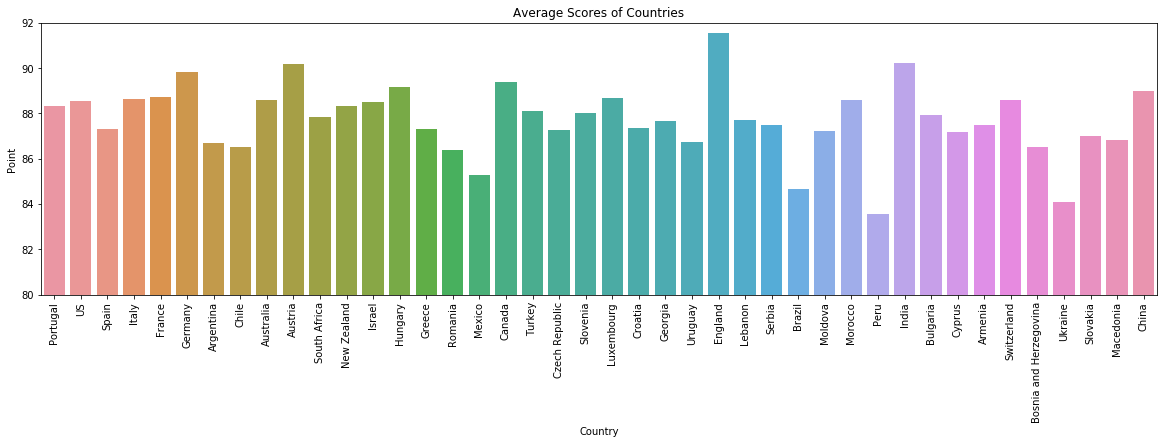

In [383]:
dictionary = {}

for country in init_df.country.unique():
    filt = init_df.country == country
    point = init_df[filt].points.mean()
    dictionary[country]=point

plt.figure(figsize=(20,5))

sns.barplot([k for k,v in dictionary.items()],[v for k,v in dictionary.items()])
plt.title("Average Scores of Countries")
plt.xticks(rotation=90)
plt.ylim(80,92)
plt.xlabel("Country")
plt.ylabel("Point")
plt.show()

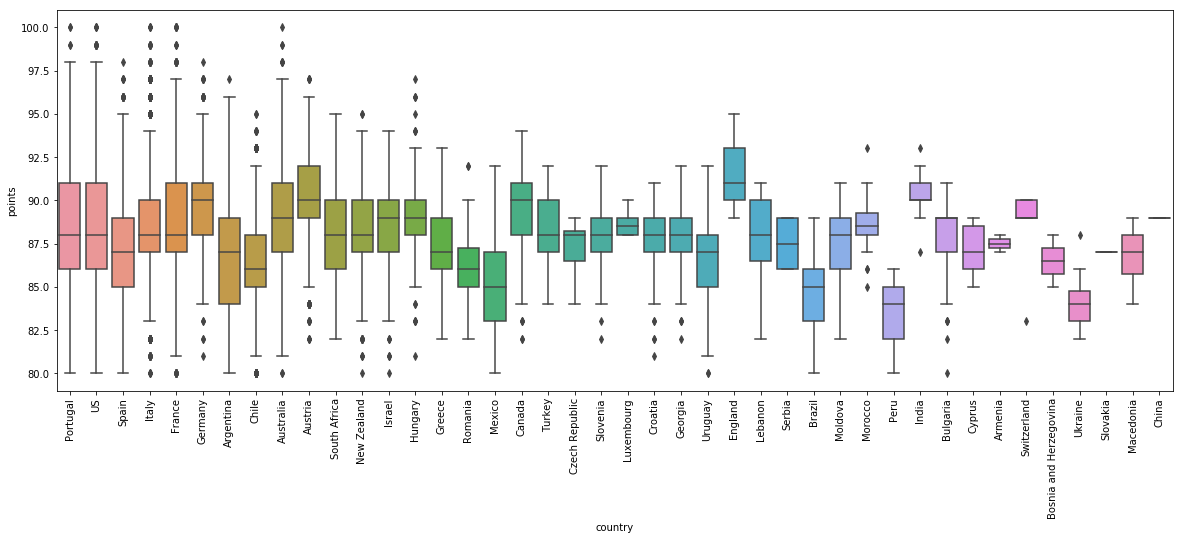

In [384]:
fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='country',y='points', data=init_df, ax = ax)
plt.xticks(rotation = 90)
plt.show()

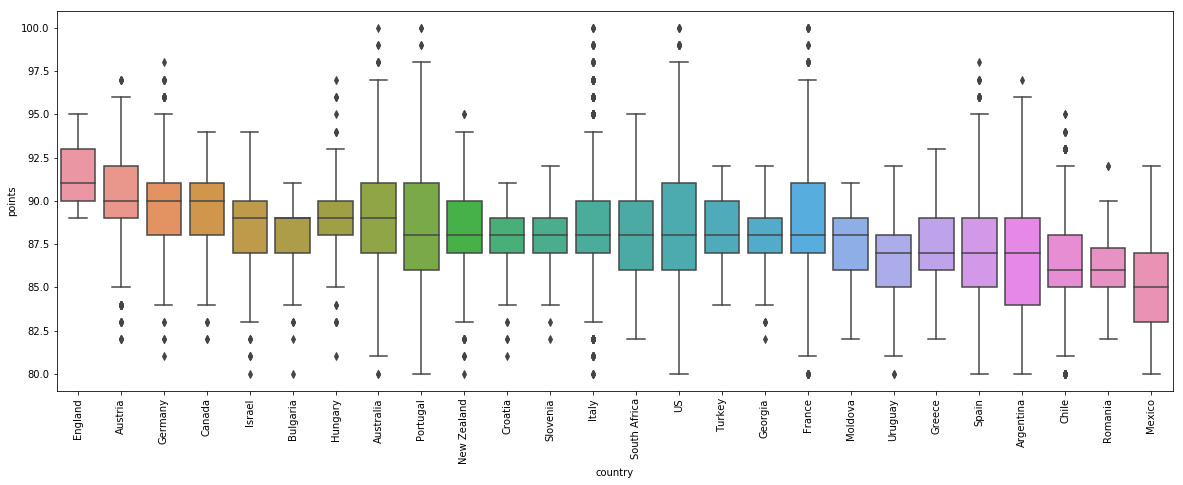

In [385]:
# only pick the country has more than 50 wine reviews
country=init_df.groupby('country').filter(lambda x: len(x) > 50)
df_countryAndPoint = pd.DataFrame({col:vals['points'] for col,vals in country.groupby('country')})
meds = df_countryAndPoint.median()
meds.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='country',y='points', data=country, order=meds.index, ax = ax)
plt.xticks(rotation = 90)

plt.show()

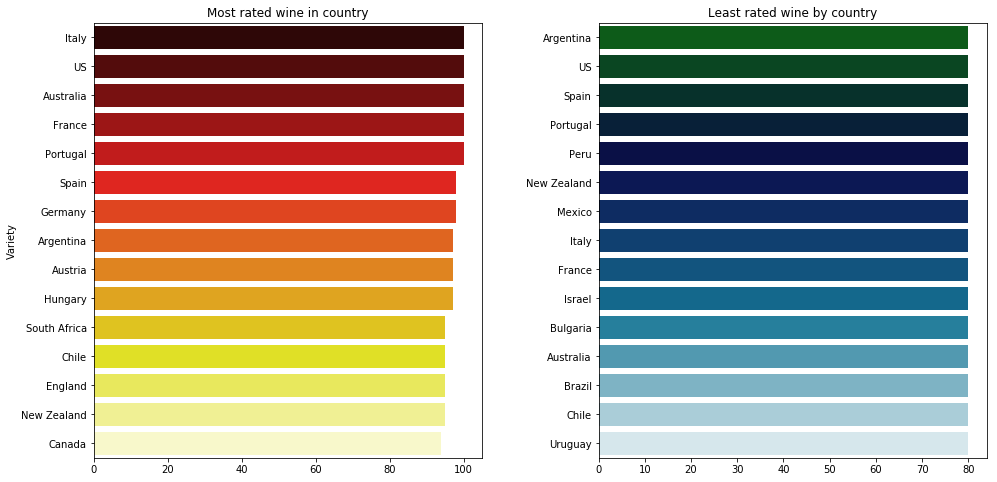

In [386]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = init_df.groupby(['country'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette= 'hot',ax=ax1)
ax1.set_title('Most rated wine in country')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = init_df.groupby(['country'])['points'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette = 'ocean',ax=ax2)
ax2.set_title('Least rated wine by country')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

Since there are only 41 countries in this data set, and from the graph we generated, we can tell the points distribution has some relationship between country and points. So we might keep this feature to do the prediction.

### Relationship between variety and point

In [387]:
init_df['variety'].count()

120974

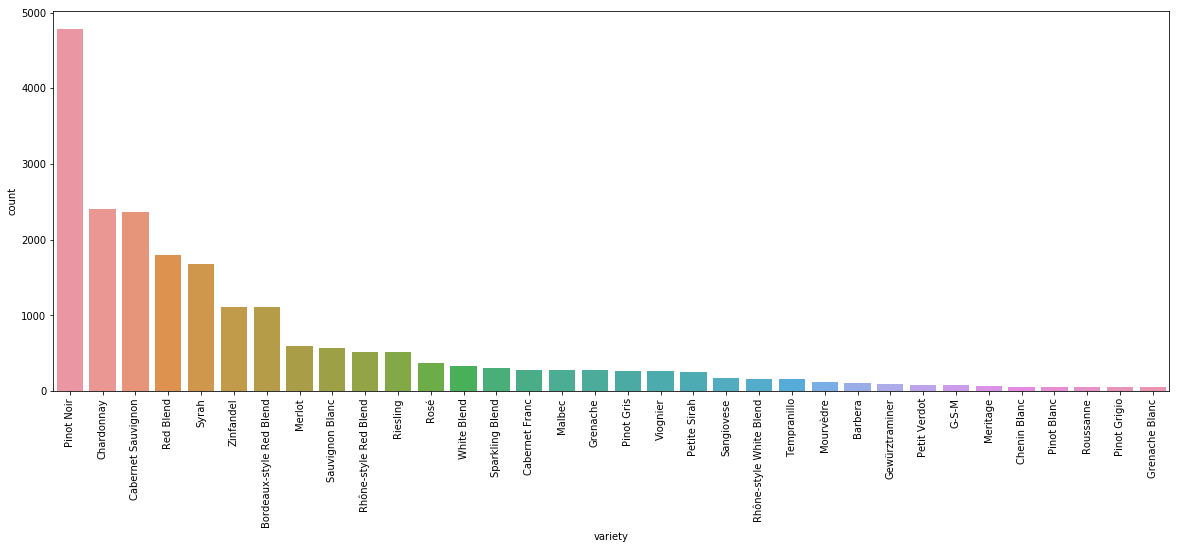

In [388]:
data = init_df.dropna()
data = data.groupby('variety').filter(lambda x: len(x) > 50)
list = data.variety.value_counts().index.tolist()
fig4, ax4 = plt.subplots(figsize = (20,7))
sns.countplot(x='variety', data=data, order = list, ax=ax4)
plt.xticks(rotation = 90)
plt.show()

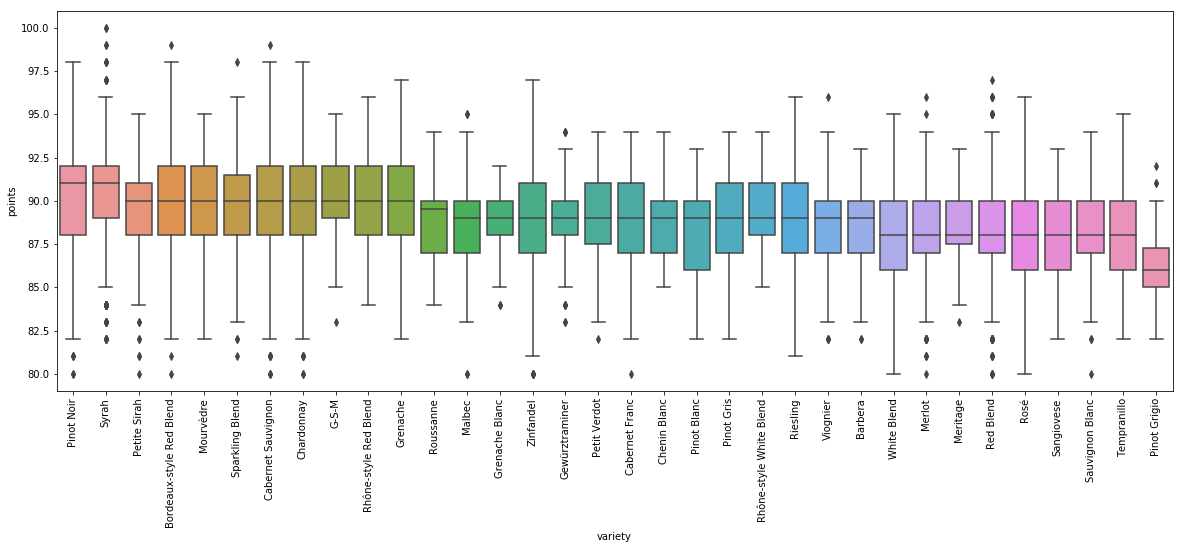

In [389]:
data = data.groupby('variety').filter(lambda x: len(x) > 50)

df4 = pd.DataFrame({col:vals['points'] for col,vals in data.groupby('variety')})
meds3 = df4.median()
meds3.sort_values(ascending=False, inplace=True)

fig3, ax3 = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='variety',y='points', data=data, order=meds3.index, ax = ax3)
plt.xticks(rotation = 90)
plt.show()

Keep this feature to do the prediction might not have huge significant difference since there are 130k variety feature and the points distribution is not varied a lot even for the different variety.

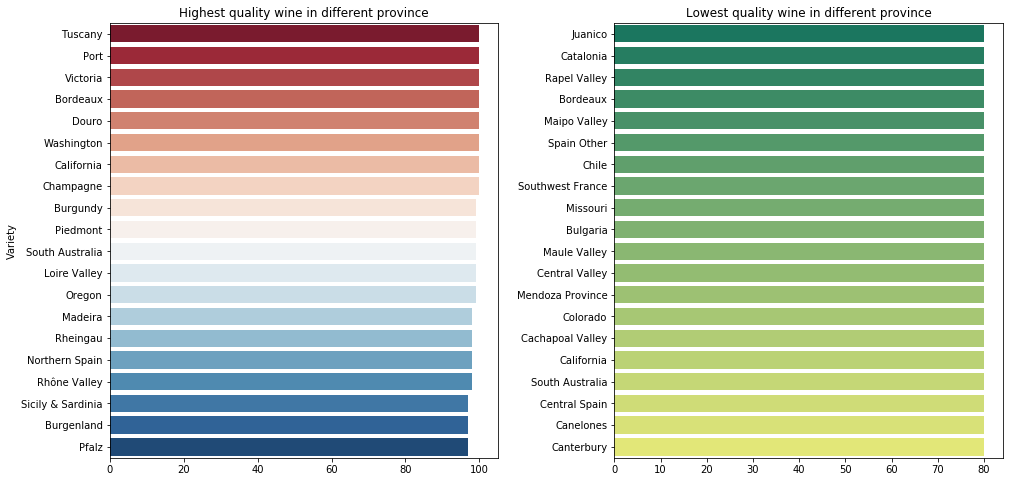

In [390]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = init_df.groupby(['province'])['points'].max().sort_values(ascending=False).to_frame()[:20]
sns.barplot(x = cnt['points'], y = cnt.index, palette= 'RdBu',ax=ax1)
ax1.set_title('Highest quality wine in different province')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = init_df.groupby(['province'])['points'].min().sort_values(ascending=True).to_frame()[:20]
sns.barplot(x = cnt['points'], y = cnt.index, palette = 'summer',ax=ax2)
ax2.set_title('Lowest quality wine in different province')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

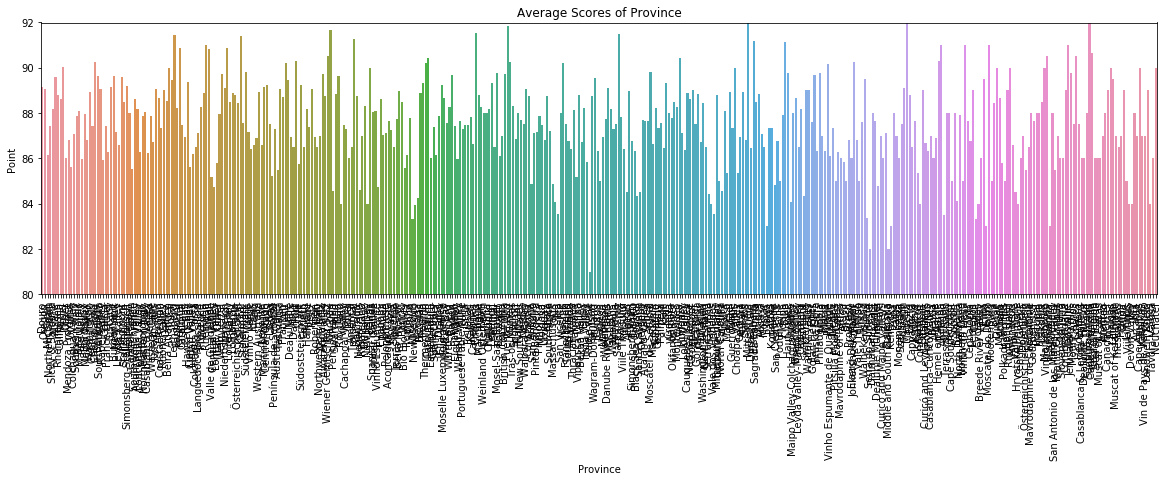

In [395]:
dictionary = {}

for province in init_df.province.unique():
    filt = init_df.province == province
    point = init_df[filt].points.mean()
    dictionary[province]=point

plt.figure(figsize=(20,5))

sns.barplot([k for k,v in dictionary.items()],[v for k,v in dictionary.items()])
plt.title("Average Scores of Province")
plt.xticks(rotation=90)
plt.ylim(80,92)
plt.xlabel("Province")
plt.ylabel("Point")
plt.show()

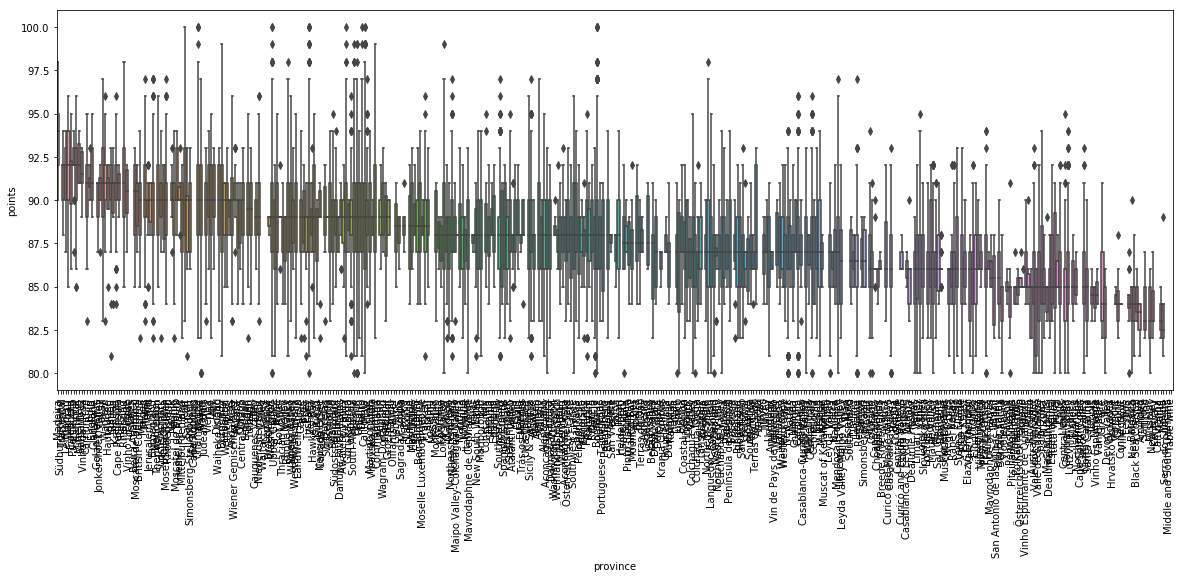

In [399]:
data = init_df.groupby('province').filter(lambda x: len(x) > 2)

df4 = pd.DataFrame({col:vals['points'] for col,vals in init_df.groupby('province')})
meds3 = df4.median()
meds3.sort_values(ascending=False, inplace=True)

fig3, ax3 = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='province',y='points', data=data, order=meds3.index, ax = ax3)
plt.xticks(rotation = 90)
plt.show()

From the graph we can tell that there exists some relationship between the points distribution and the province feature. But since there are too much province here so it might be hard to use this feature to do the prediction.

### Taster Name

Text(0,0.5,'')

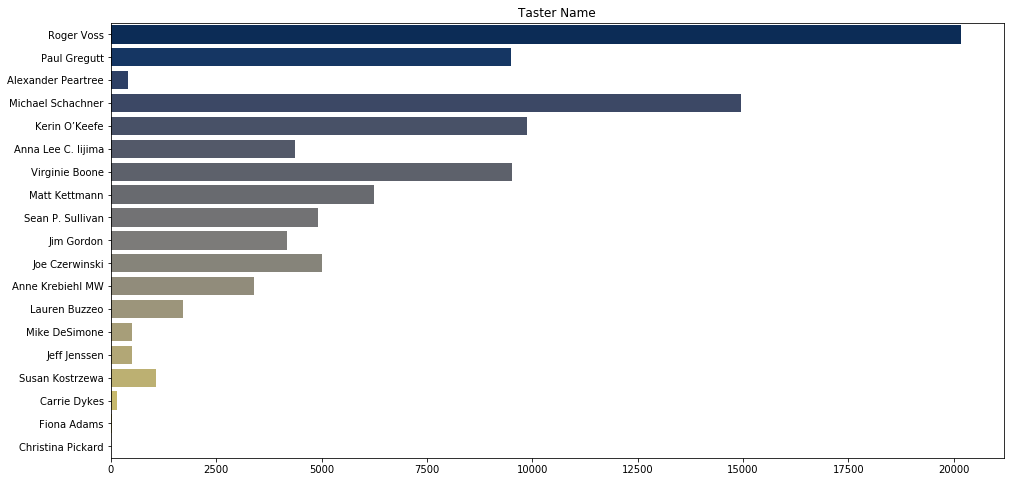

In [391]:
f,ax = plt.subplots(figsize = (16,8))
sns.countplot(y = init_df['taster_name'], palette = 'cividis', ax = ax)
ax.set_title('Taster Name')
ax.set_xlabel('')
ax.set_ylabel('')

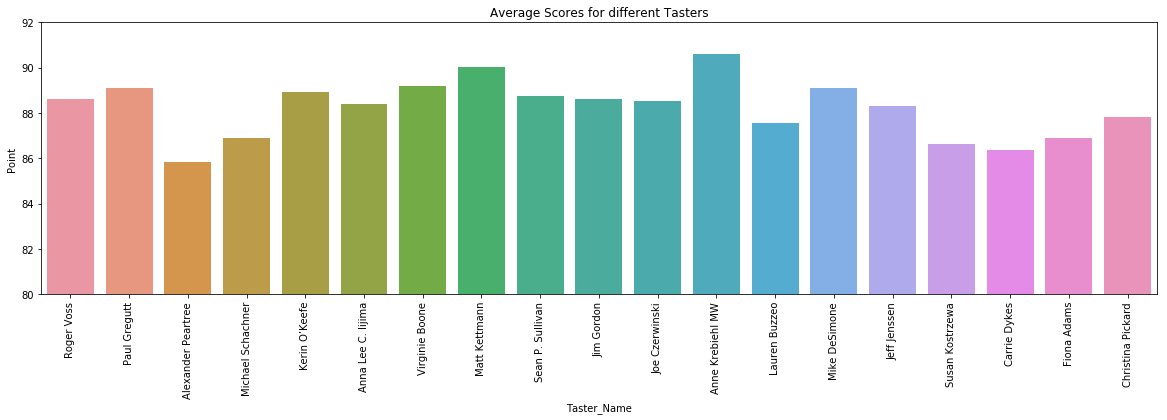

In [392]:
dictionary = {}

for taster_name in init_df.taster_name.unique():
    filt = init_df.taster_name == taster_name
    point = init_df[filt].points.mean()
    dictionary[taster_name]=point

plt.figure(figsize=(20,5))

sns.barplot([k for k,v in dictionary.items()],[v for k,v in dictionary.items()])
plt.title("Average Scores for different Tasters")
plt.xticks(rotation=90)
plt.ylim(80,92)
plt.xlabel("Taster_Name")
plt.ylabel("Point")
plt.show()

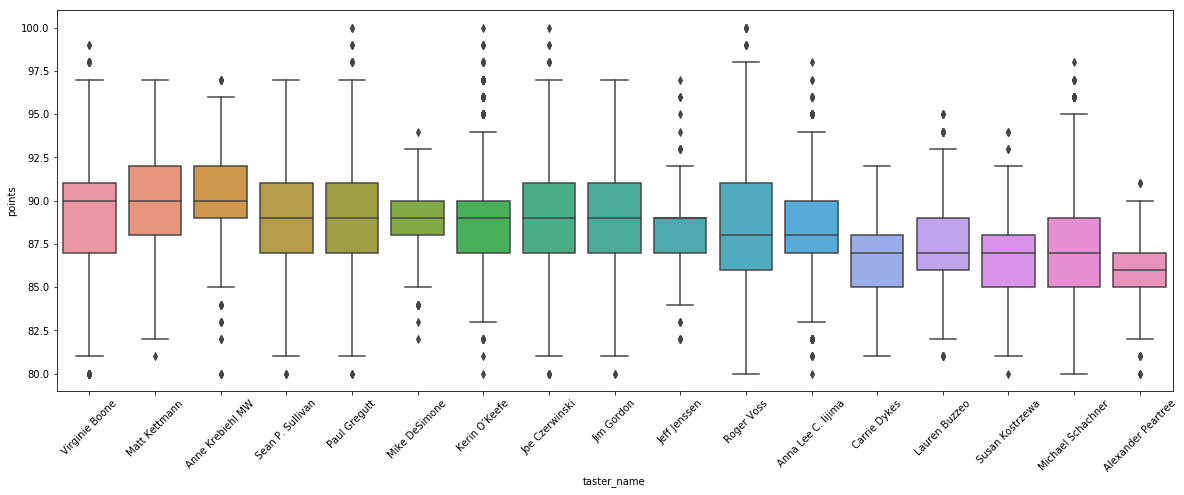

In [394]:
# only pick the country has more than 50 wine reviews
country=init_df.groupby('taster_name').filter(lambda x: len(x) > 50)
df_countryAndPoint = pd.DataFrame({col:vals['points'] for col,vals in country.groupby('taster_name')})
meds = df_countryAndPoint.median()
meds.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='taster_name',y='points', data=country, order=meds.index, ax = ax)
plt.xticks(rotation = 45)

plt.show()

Since there are limited tasters in the data set, this feature may have some impact on the prediction result.

### Description

In [246]:
df_length = init_df[['description','points']]
df_length.head()

,description,points
0,"Aromas include tropical fruit, broom, brimston...",87
1,"This is ripe and fruity, a wine that is smooth...",87
2,"Tart and snappy, the flavors of lime flesh and...",87
3,"Pineapple rind, lemon pith and orange blossom ...",87
4,"Much like the regular bottling from 2012, this...",87


In [247]:
df_length = df_length.assign(description_length = df_length['description'].apply(len))
df_length.head()

,description,points,description_length
0,"Aromas include tropical fruit, broom, brimston...",87,172
1,"This is ripe and fruity, a wine that is smooth...",87,227
2,"Tart and snappy, the flavors of lime flesh and...",87,186
3,"Pineapple rind, lemon pith and orange blossom ...",87,199
4,"Much like the regular bottling from 2012, this...",87,249


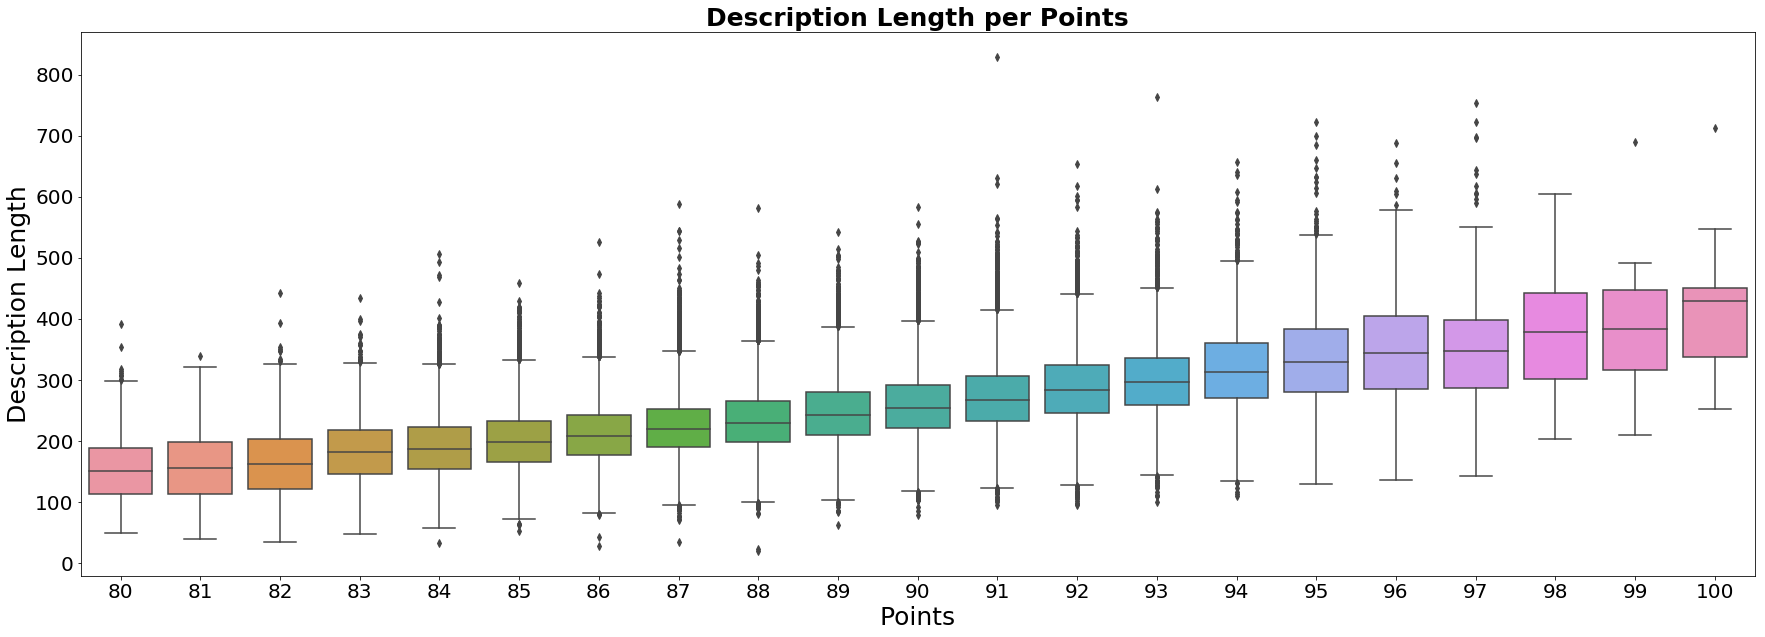

In [248]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x='points', y='description_length', data=df_length)
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Description Length per Points', fontweight="bold", size=25) # Title
ax.set_ylabel('Description Length', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
plt.show()

We can tell that there exists relationship between the length of description and the points

(-0.5, 399.5, 199.5, -0.5)

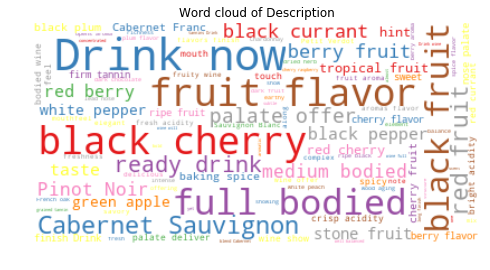

In [235]:
plt.figure(figsize= (8.0,6.0))
plt.title('Word cloud of Description')
wc = WordCloud(max_words=100,max_font_size=40,background_color='white', stopwords = STOPWORDS,colormap='Set1')
wc.generate(' '.join(init_df['description']))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')

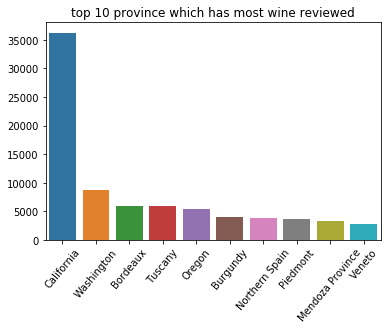

In [336]:
x=init_df['province'].value_counts().head(10).index
y=init_df['province'].value_counts().head(10).values
ax=sns.barplot(x,y)
ax.set_xticklabels(ax.get_xticklabels(),rotation=50)
plt.title('top 10 province which has most wine reviewed')
plt.show()